# **Chapter 1: Parameter estimation by optimization**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
nohitter_times = np.array([ 843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
 715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
 104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
 166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
 308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
 1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
  77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
 557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
 1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
 219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
 176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
 774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
 192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
 156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
 576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
 3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
 110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
 192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
 1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
 2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
 1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
 420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
876,  381,  905,  156,  419,  239,  119,  129,  467])

## How often do we get no-hitters?

In [4]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [5]:
plt.style.use('seaborn-darkgrid')

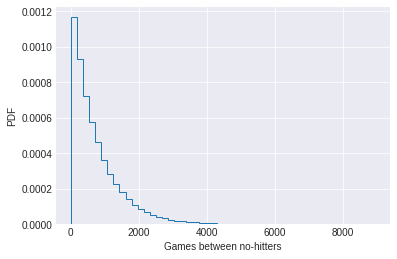

In [6]:
np.random.seed(42)

tau = np.mean(nohitter_times)

inter_nohitter_time = np.random.exponential(tau, 100000)

plt.hist(inter_nohitter_time, bins=50, density=True, histtype='step')
plt.xlabel('Games between no-hitters')
plt.ylabel('PDF')
plt.show()

## Do the data follow our story?

In [8]:
def ecdf(data):
    """Computer ECDF for a one-dimentional array of measurements"""
    n=len(data)
    x=np.sort(data)
    y=np.arange(1, 1+n)/n

    return x, y

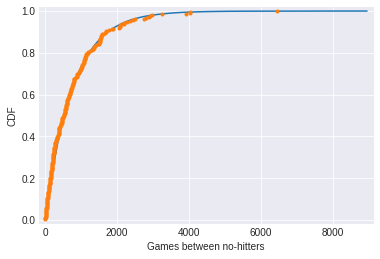

In [9]:
x, y = ecdf(nohitter_times)
x_theor, y_theor = ecdf(inter_nohitter_time)

plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

plt.show()

## How is this parameter optimal?

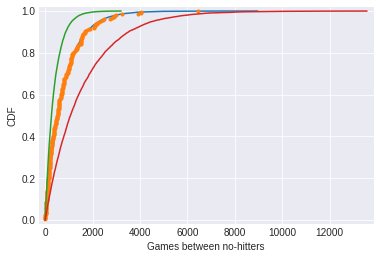

In [10]:
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

samples_half = np.random.exponential(tau/2, 10000)
samples_double = np.random.exponential(tau*2, 10000)

x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

plt.plot(x_half, y_half)
plt.plot(x_double, y_double)

## EDA of literacy/fertility data

In [11]:
female_literacy_fertility = 'https://assets.datacamp.com/production/repositories/470/datasets/f1e7f8a98c18da5c60b625cb8af04c3217f4a5c3/female_literacy_fertility.csv'

df = pd.read_csv(female_literacy_fertility)

In [12]:
df.columns

Index(['Country ', 'Continent', 'female literacy', 'fertility', 'population'], dtype='object')

In [13]:
fertility = df['fertility'].values
illiteracy = (100 - df['female literacy']).values

In [16]:
def pearson_r(x, y):
  """Computer Pearson correlation coefficient between two arrays."""
  corr_mat = np.corrcoef(x, y)
  return corr_mat[0, 1]

0.8041324026815344


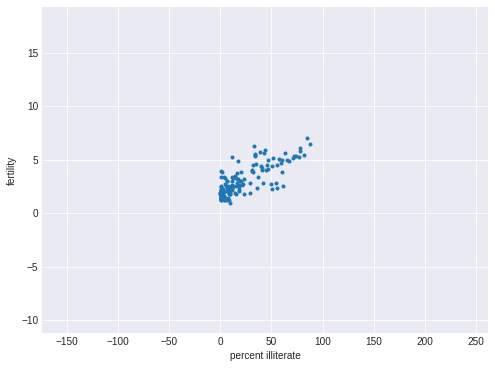

In [17]:
plt.figure(figsize= (8,6))
plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(2)
plt.xlabel('percent illiterate')
plt.ylabel('fertility')

print(pearson_r(illiteracy, fertility))

## Linear regression

slope =  0.04979854809063423 children per woman / percent illiterate
intercept =  1.888050610636557 children per woman


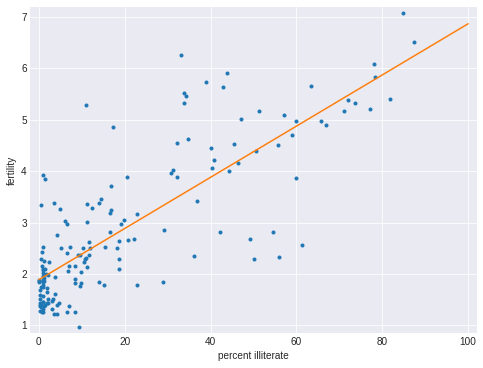

In [20]:
plt.figure(figsize = (8, 6))
plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('percent illiterate')
plt.ylabel('fertility')

a, b = np.polyfit(illiteracy, fertility, 1)

print('slope = ', a, 'children per woman / percent illiterate')
print('intercept = ', b, 'children per woman')

x = np.array([0, 100])
y = a * x + b

plt.plot(x, y)

## How is it optimal?

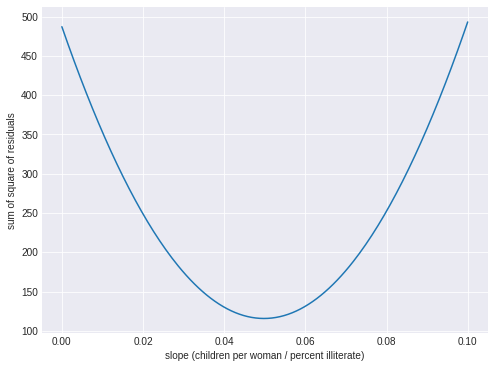

In [22]:
plt.figure(figsize = (8, 6))
a_vals = np.linspace(0, 0.1, 200)

rss = np.empty_like(a_vals)

for i, a in enumerate(a_vals):
  rss[i] = np.sum((fertility - a * illiteracy - b) ** 2)

plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')
plt.show()

## Linear regression on appropriate Anscombe data

In [25]:
anscombe_url = 'https://assets.datacamp.com/production/repositories/470/datasets/fe820c6cbe9bcf4060eeb9e31dd86aa04264153a/anscombe.csv'
anscombe = pd.read_csv(anscombe_url, skiprows = 1)

In [26]:
len(anscombe)

11

In [27]:
x = anscombe['x'].values
y = anscombe['y'].values

In [28]:
a, b = np.polyfit(x, y, deg =1)
print(a, b)

0.5000909090909095 3.000090909090909


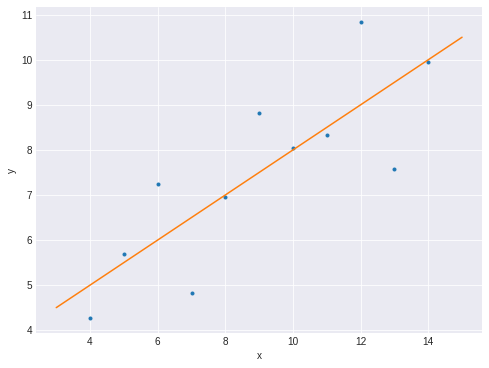

In [31]:
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

plt.figure(figsize = (8, 6))
plt.plot(x, y, marker = '.', linestyle='none')
plt.plot(x_theor, y_theor)

plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Linear regression on all Anscombe data

In [32]:
x1 = anscombe['x'].values
x2 = anscombe['x.1'].values
x3 = anscombe['x.2'].values
x4 = anscombe['x.3'].values

In [33]:
y1 = anscombe['y'].values
y2 = anscombe['y.1'].values
y3 = anscombe['y.2'].values
y4 = anscombe['y.3'].values

In [34]:
anscombe_x = [x1, x2, x3, x4]
anscombe_y = [y1, y2, y3, y4]

In [35]:
for x, y in zip(anscombe_x, anscombe_y):
  a, b = np.polyfit(x, y, deg=1)

  print('slope:', a, 'intercept:', b)

slope: 0.5000909090909095 intercept: 3.000090909090909
slope: 0.5000000000000004 intercept: 3.0009090909090896
slope: 0.4997272727272731 intercept: 3.0024545454545453
slope: 0.4999090909090908 intercept: 3.0017272727272735
